In [5]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sb
%matplotlib inline

In [8]:
'''
1-cura
2-obito
3-obito outras causas
9-ignorado
remover casos de item 3 e 9

tranformar cada instancia de cada coluna em labels 

talvez remover coluna grupo de risco 
''' 
dados = pd.read_csv('https://raw.githubusercontent.com/ChernoBen/IAatividadeII/main/new_dataset', sep= ';')
'''removendo valores diferentes de obitos e cura'''
dados  = dados.drop(dados[dados['EVOLUCAO'] > 2 ].index)
dados  = dados.drop(dados[dados['EVOLUCAO'] < 1  ].index)

In [50]:
from sklearn.model_selection import train_test_split

gabarito = dados['EVOLUCAO']
X = np.array(dados.drop('EVOLUCAO',axis=1))
'''Dividindo dataset em treino e teste / caracteristicas X classes
x_train,x_teste,y_train,y_teste = train_test_split(dados.drop('EVOLUCAO',axis=1),
                                                   dados['EVOLUCAO'],test_size=0.3,random_state=42) '''
'''criando rotulos para coluna grupos de risco'''
def rotula(dataset):
    arr =[]
    dt = dataset
    for item in dataset:
        if item == 'S':
            arr.append(1)
        else:
            arr.append(0)
    return arr
X[:,14] = rotula(X[:,14])


"\ndef rotula_gab(dataset):\n    arr = []\n    for item in dataset:\n        if item == 1.0:\n            arr.append(0.0)\n        else:\n            arr.append(1.0)\n    return arr       \nx_train['FATOR_RISC'] = rotula(x_train['FATOR_RISC'])\nx_teste['FATOR_RISC'] = rotula(x_teste['FATOR_RISC'])\ny_train = rotula_gab(y_train)\ny_teste = rotula_gab(y_teste)\n"

In [51]:
'''Intanciando kmeans'''
kmeans = KMeans(n_clusters=2)
'''Treinando'''
kmeans.fit(X)
'''visualizar labels'''
kmeans.labels_
lb = kmeans.cluster_centers_
'''adicionando resultados a uma nova coluna na base original'''
dados['result'] = kmeans.labels_
'''gerando previsoes e comparando com gabarito'''
y_kmeans = kmeans.predict(X)
y_kmeans

"testantado\ntestagem = x_train\ntestagem['result'] = y_kmeans"

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


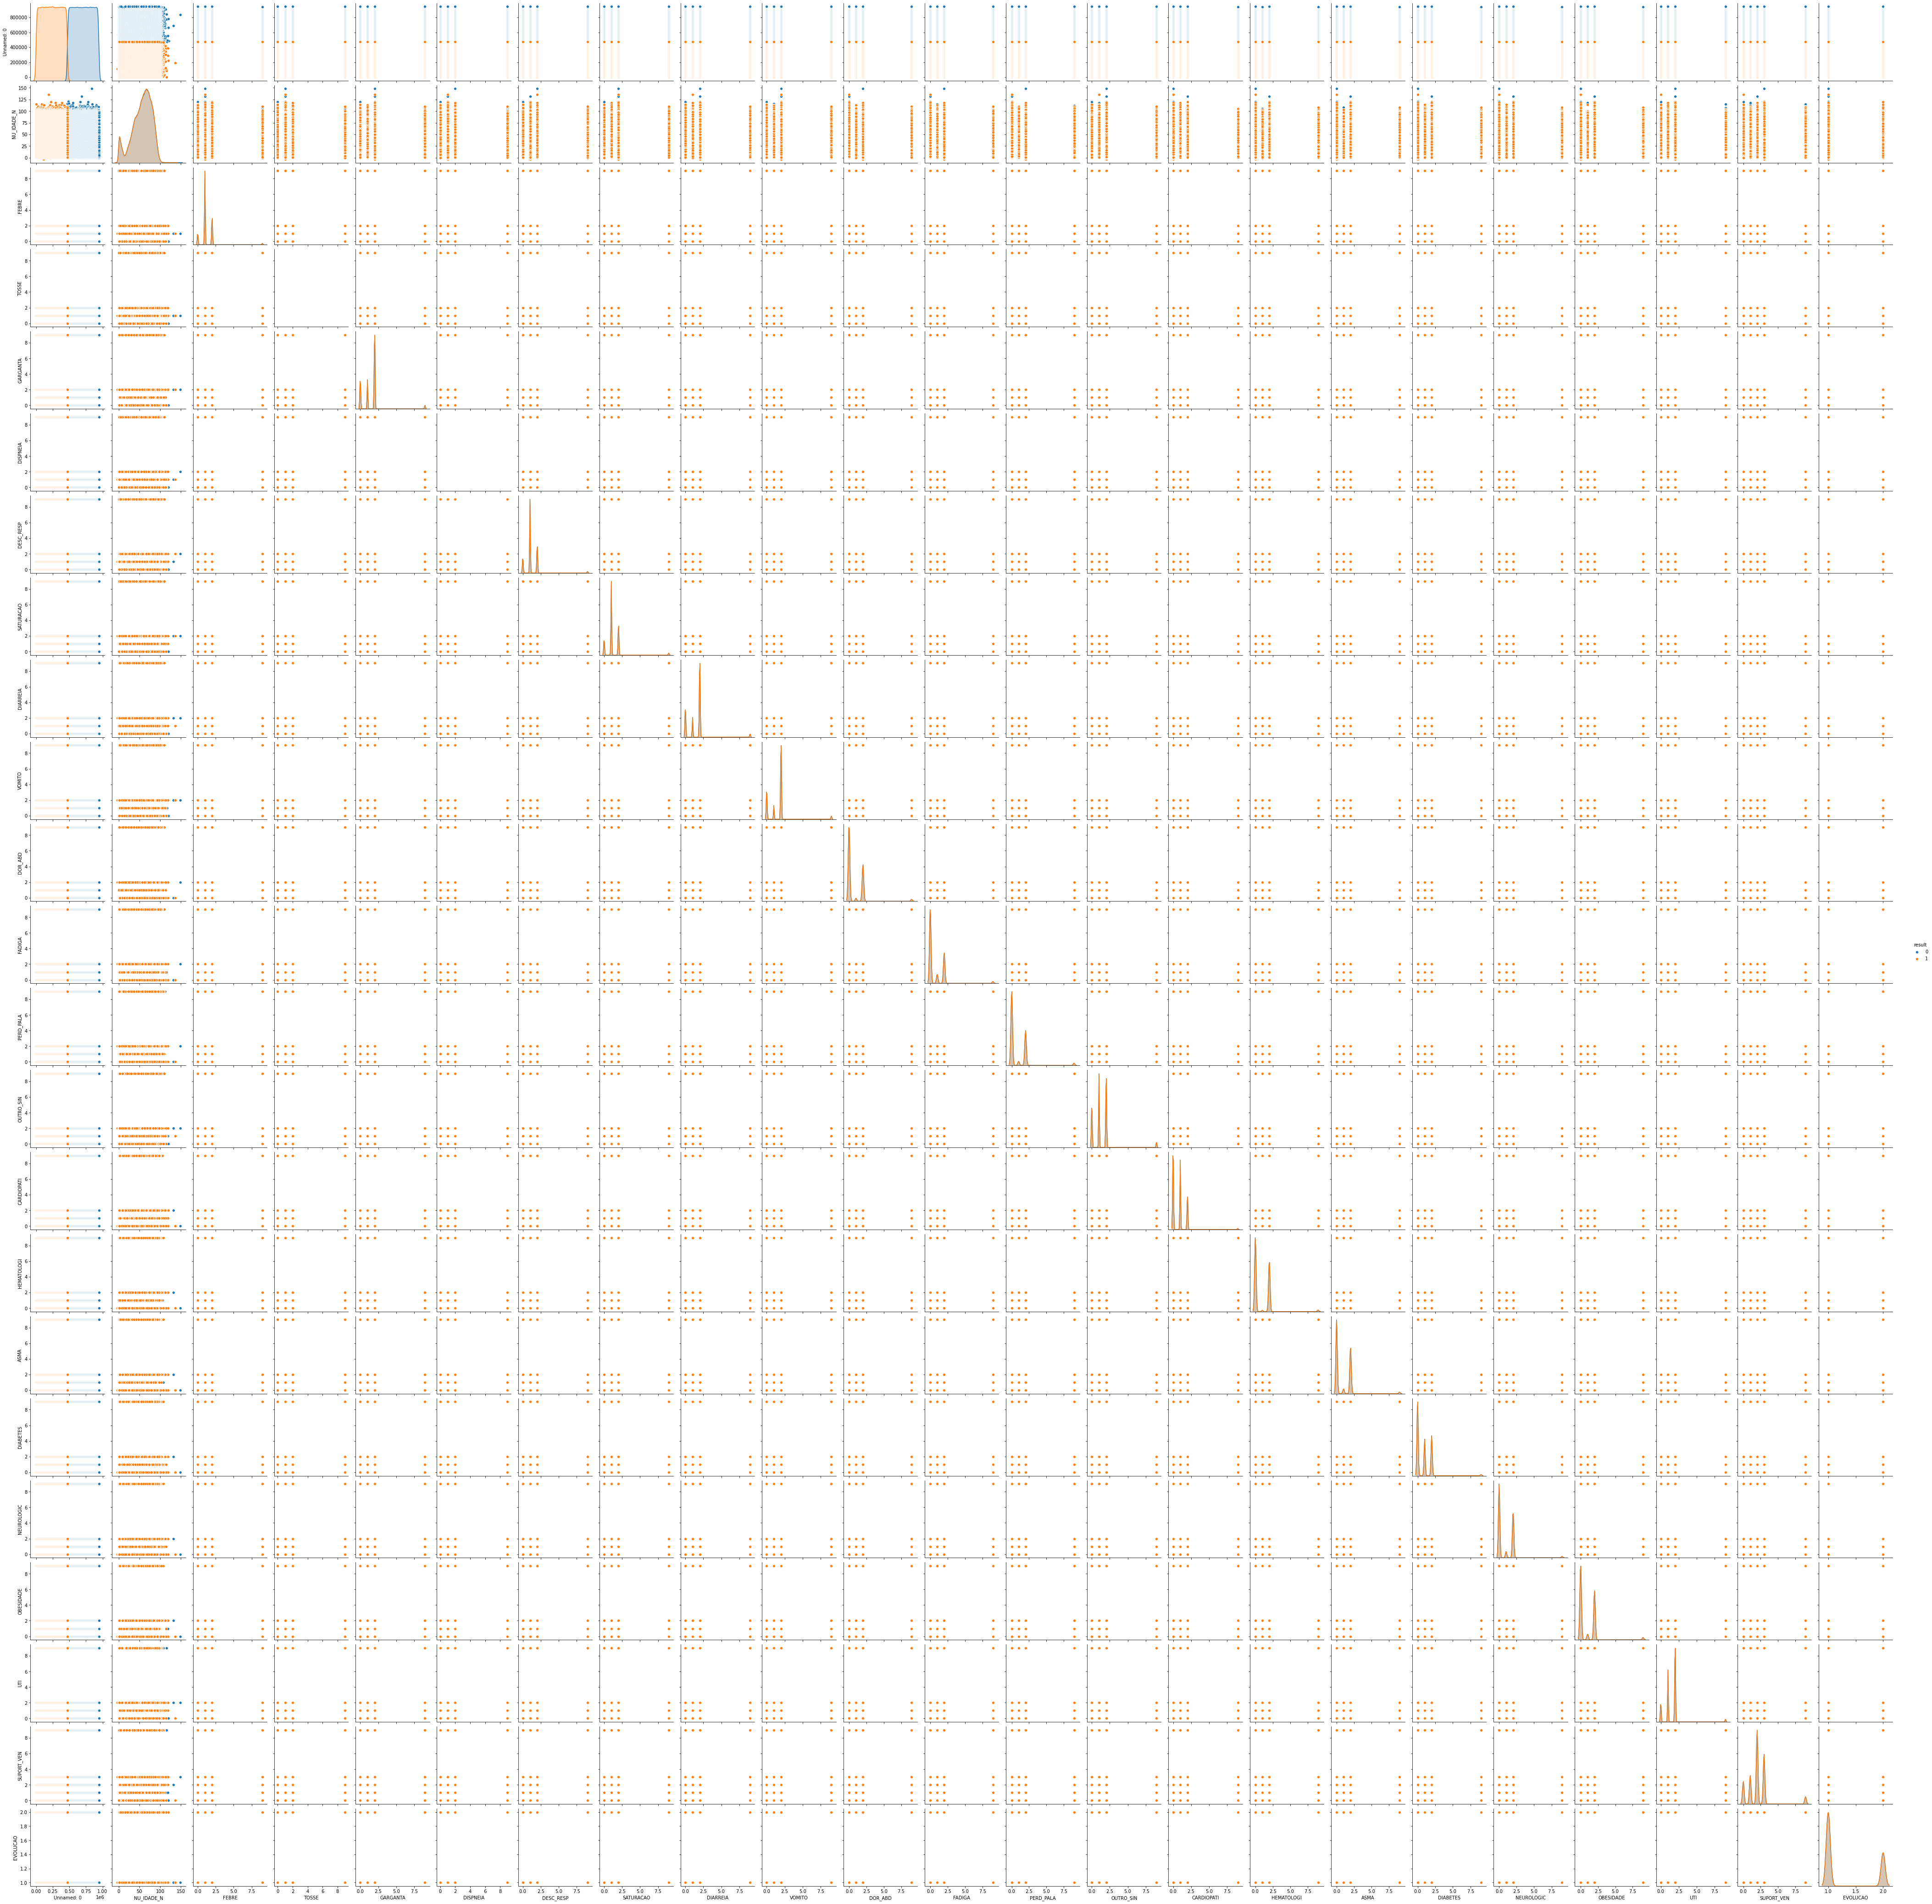

In [52]:
#sb.pairplot(dados,'result')
sb.pairplot(dados,'result',hue='FATOR_RISC')



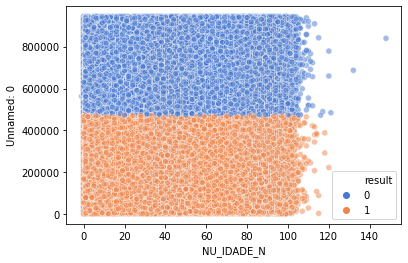

In [48]:
'''sb.scatterplot(data=testagem, x="NU_IDADE_N", y="Unnamed: 0", hue="result",legend="full",sizes=(40, 400),
               alpha=.5, palette="muted")
talvez rotular as quantidades de pessoas por idade '''